# SQLAlchemy Homework - Surfs Up!
---------------

## Step 1 - Climate Analysis and Exploration

### Setup 

In [1]:
# Import the dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
# We will also need

import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

In [4]:
# For the reflection and engine: Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

### Using reflection to map the DataBase

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [20]:
# reflect an existing database into a new model
Base = automap_base()

In [21]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
 # View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
 # Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [24]:
 # Create our session (link) from Python to the DB
session = Session(engine)

###  Exploratory Precipitation Analysis

In [47]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [46]:
# Calculate the date one year from the last date in data set
last = dt.date(2017, 8, 23) 
last- dt.timedelta(days=365)

datetime.date(2016, 8, 23)

In [50]:
# Perform a query to retrieve the data and precipitation scores
precipitation_year = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>"2016-08-23").all()

In [53]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_year)
df.set_index('date', inplace=True, )

In [54]:
# Sort the dataframe by date
df = df.sort_values('date')

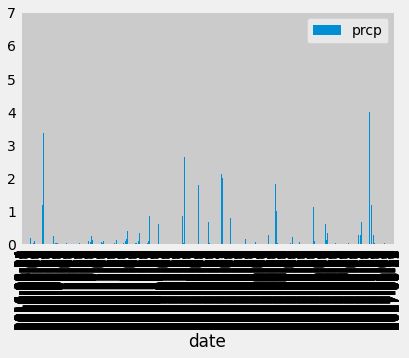

In [58]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.tight_layout()
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

 ### Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [84]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
session.query(func.count(Measurement.tobs), Measurement.station).group_by(Measurement.station).all()


[(1979, 'USC00511918'),
 (2709, 'USC00513117'),
 (2202, 'USC00514830'),
 (2612, 'USC00516128'),
 (1372, 'USC00517948'),
 (511, 'USC00518838'),
 (2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2669, 'USC00519523')]

In [ ]:
# List the stations and the counts in descending order.

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
order_by(Measurement.tobs).first()
highest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
order_by(Measurement.tobs.desc()).first()
average = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f'The lowest temperature is {lowest_temp}')
print(f'The highets temperature is {highest_temp}')
print(f'The average temperature is {average}')

The lowest temperature is (54.0,)
The highets temperature is (85.0,)
The average temperature is [(71.66378066378067,)]


In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date>"2016-08-23").all()

In [98]:
df_temp = pd.DataFrame(year_temp)

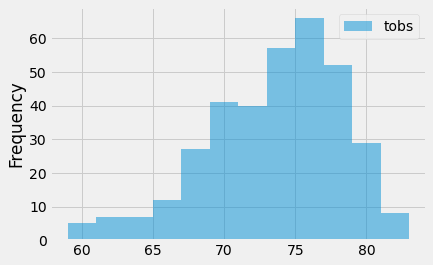

In [99]:
graph = df_temp.plot.hist(bins=12, alpha=0.5)

###  Close session

In [ ]:
# We close our session
session.close()